In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import requests
from bs4 import BeautifulSoup as BS
import re
import warnings
import folium
import bokeh
from numpy import NaN
import matplotlib.pyplot as plt
import scrapy
from pybaseball import pitching_stats
from pybaseball import statcast_single_game,statcast_pitcher,pitching_stats_bref
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import schedule_and_record

pd.set_option('display.max_columns', 100)

In [127]:
full_quality = pd.read_csv('full_quality.csv')

In [128]:
all_starts = pd.read_csv('all_starts.csv')

In [129]:
full_quality.tail()

,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,IR,IS,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,RE24,aLI,DFS(DK),DFS(FD),Appearance,Decision,Result,Score
31004,Jordan Montgomery,2018-04-13,NYY,DET,6.0,5,3,3,0,4,1,0,91,62,54.0,NaN,NaN,23,23,1,0,0,0,0,0,0,0,0,0,0,0,4.50,0.150,0.177,0.785,16.50,33.0,GS-7,W,W,8-6
31005,Sonny Gray,2018-04-07,NYY,BAL,6.0,4,3,3,2,4,0,0,86,55,54.0,NaN,NaN,25,23,2,0,0,0,0,0,0,0,0,0,0,0,4.50,0.013,0.188,1.178,15.90,33.0,GS-6,W,W,8-3
31006,Masahiro Tanaka,2018-04-05,NYY,BAL,6.1,6,3,3,0,7,1,0,93,65,56.0,NaN,NaN,24,24,1,0,0,0,0,0,0,0,0,0,0,0,4.26,-0.014,1.169,0.984,18.65,31.0,GS-7,L,L,2-5
31007,Luis Severino,2018-04-04,NYY,TBR,7.1,5,2,2,1,7,0,0,92,63,66.0,NaN,NaN,26,25,1,0,0,0,0,0,2,0,0,0,0,0,2.45,0.149,2.545,0.673,26.90,49.0,GS-8,W,W,7-2
31008,Masahiro Tanaka,2018-03-30,NYY,TOR,6.0,3,1,1,0,8,1,0,79,61,70.0,NaN,NaN,21,21,2,0,0,0,0,0,0,0,0,0,0,0,1.50,0.236,1.973,0.805,29.70,51.0,GS-6,W,W,4-2


In [130]:
all_starts.tail()

,Rk,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev
63167,158,CC Sabathia,2018-04-19,NYY,TOR,4.1,4,2,0,1,1,0,2,71.0,50.0,51,20,18,0,0,0,1,0,0,0,0,0,0,0,0,0.00,-0.023,1.516,GS-5,NaN,W,4-3,10,4,2018,381,16.420993
63168,159,Luis Cessa,2018-09-30,NYY,BOS,0.1,5,4,3,0,0,0,1,14.0,10.0,27,6,6,1,0,0,0,0,0,0,0,0,0,0,0,81.00,-0.289,1.173,GS-1,L,L,2-10,10,9,2018,19,11.301814
63169,160,Sonny Gray,2018-06-30,NYY,BOS,2.1,7,6,6,2,0,1,0,68.0,46.0,17,16,13,1,0,0,0,0,1,0,1,0,0,0,0,23.14,-0.386,0.682,GS-3,L,L,0-11,10,6,2018,146,17.471355
63170,161,Jordan Montgomery,2018-05-01,NYY,HOU,1.0,0,0,0,0,0,0,0,7.0,5.0,53,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.048,0.630,GS-1,NaN,W,4-0,10,5,2018,35,11.611209
63171,162,Sonny Gray,2018-04-20,NYY,TOR,3.1,5,5,5,4,0,1,0,73.0,39.0,26,19,15,2,0,0,0,0,0,0,0,0,0,0,2,13.50,-0.434,1.191,GS-4,NaN,L,5-8,10,4,2018,146,17.471355


In [2]:
#all_starts = all_starts.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

In [131]:
full_quality.to_csv('full_quality.csv')

all_starts.to_csv('all_starts.csv')

In [5]:
Counter(all_starts.Result)

Counter({'W': 31585, 'L': 31585, 'T': 2})

In [6]:
Counter(full_quality.Result)

Counter({'W': 20902, 'L': 10107})

In [7]:
Counter(full_quality.Decision)

Counter({' W': 16898, nan: 8661, ' L': 5450})

In [8]:
all_starts.shape

(63172, 46)

In [9]:
full_quality.shape

(31009, 42)

In [10]:
Counter(all_starts.IP).most_common();

In [11]:
worst_starts_ever = all_starts.loc[all_starts.IP == 0.0]

In [12]:
worst_starts_ever.loc[worst_starts_ever.Result == 'W']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Rk,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev
3060,3060,3060,3060,3060,147,Scott Mathieson,2006-09-02,PHI,ATL,0.0,0,1,1,0,1,0,0,5.0,3.0,47,1,1,0,0,0,0,0,0,0,0,0,0,0,1,inf,-0.034,0.870,GS-1,NaN,W,16-4,10,9,2006,8,13.778218
8251,8251,8251,8251,8251,153,Vicente Padilla,2007-09-16,TEX,OAK,0.0,1,2,1,0,0,0,1,10.0,5.0,42,2,1,0,0,0,1,0,0,0,0,0,0,0,0,inf,-0.088,1.140,GS-1,NaN,W,11-9,10,9,2007,126,17.503103
9718,9718,9718,9718,9718,161,Jeff Karstens,2007-04-28,NYY,BOS,0.0,2,0,0,0,0,0,0,6.0,3.0,46,2,2,0,0,0,0,0,0,0,0,0,0,0,0,undef,-0.087,1.130,GS-1,NaN,W,3-1,10,4,2007,91,15.226664
14086,14086,14086,14086,14086,161,Dontrelle Willis,2008-04-11,DET,CHW,0.0,0,1,1,2,0,0,0,11.0,3.0,44,2,0,0,0,0,0,0,0,0,0,0,0,0,1,inf,-0.129,1.323,GS-1,NaN,W,5-2,10,4,2008,109,15.454360
21865,21865,21865,21865,21865,162,John Maine,2010-05-20,NYM,WSN,0.0,0,0,0,1,0,0,0,5.0,1.0,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,undef,-0.035,0.820,GS-1,NaN,W,10-7,10,5,2010,96,15.936136
25429,25429,25429,25429,25429,162,Miguel Batista,2011-04-22,STL,CIN,0.0,0,0,0,1,0,0,0,4.0,0.0,49,1,0,0,0,0,0,0,0,0,1,0,0,0,0,undef,-0.062,1.185,GS-1,NaN,W,4-2,10,4,2011,96,16.830215
29314,29314,29314,29314,29314,161,Jered Weaver,2012-05-28,LAA,NYY,0.0,2,3,0,0,0,0,3,10.0,6.0,40,3,3,0,0,0,0,0,0,0,0,0,0,0,0,undef,-0.217,1.430,GS-1,NaN,W,9-8,10,5,2012,331,17.404150
36929,36929,36929,36929,36929,162,Clayton Richard,2013-06-21,SDP,LAD,0.0,0,0,0,0,0,0,0,NaN,NaN,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,undef,NaN,NaN,GS-1,NaN,W,5-2,10,6,2013,200,16.627760
50534,50534,50534,50534,50534,160,Carlos Carrasco,2016-09-17,CLE,DET,0.0,1,0,0,0,0,0,0,2.0,1.0,48,1,1,0,0,0,0,0,0,0,0,0,0,0,0,undef,-0.035,0.870,GS-1,NaN,W,1-0,10,9,2016,171,19.057953
57821,57821,57821,57821,57821,160,Anibal Sanchez,2017-09-05,DET,KCR,0.0,1,1,1,0,0,0,0,5.0,3.0,44,1,1,0,0,0,0,0,0,0,0,0,0,0,0,inf,-0.057,0.870,GS-1,NaN,W,13-2,10,9,2017,286,16.638338


In [13]:
Counter(all_starts.Date.str.len())

Counter({10: 63172})

In [14]:
all_starts['date_length'] = all_starts.Date.str.len()

In [15]:
all_starts.shape

(63172, 46)

In [16]:
all_starts.Date = all_starts.Date.str[:10]

full_quality.Date = full_quality.Date.str[:10]

In [17]:
Counter(all_starts.date_length)

Counter({10: 63172})

In [18]:
all_starts.Date = pd.to_datetime(all_starts.Date, format='%Y%m%d', errors='ignore')

full_quality.Date = pd.to_datetime(full_quality.Date, format='%Y%m%d', errors='ignore')

In [19]:
print(type(all_starts.Date))

<class 'pandas.core.series.Series'>


In [20]:
all_starts['Month'] = pd.to_datetime(all_starts['Date'], format='%Y-%m-%d').dt.month

all_starts["Month"] = all_starts.Month.map("{:02}".format)

all_starts['Year'] = pd.to_datetime(all_starts['Date'], format='%Y-%m-%d').dt.year

In [21]:
full_quality['Month'] = pd.to_datetime(full_quality['Date'], format='%Y-%m-%d').dt.month

full_quality["Month"] = full_quality.Month.map("{:02}".format)

full_quality['Year'] = pd.to_datetime(full_quality['Date'], format='%Y-%m-%d').dt.year

In [22]:
all_starts['number_of_apps'] = all_starts.groupby('Player')['Player'].transform('size')

all_starts['standard_dev'] = all_starts.groupby('Player')['GSc'].transform('std')


hundred_starts = all_starts.loc[all_starts.number_of_apps >= 100]

In [23]:
all_starts;

In [24]:
list(all_starts.columns.values);

In [25]:
#all_starts = all_starts.drop(columns=['DFS(DK)','DFS(FD)','RE24','IR','IS'])

(array([   32.,   363.,  2504.,  6495., 11131., 16352., 16350.,  8151.,
         1677.,   117.]),
 array([-16.,  -4.,   8.,  20.,  32.,  44.,  56.,  68.,  80.,  92., 104.]),
 <a list of 10 Patch objects>)

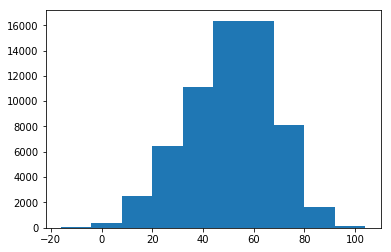

In [26]:
plt.hist(all_starts.GSc)

In [27]:
best_500_performances = all_starts.sort_values(by='GSc',ascending=False).head(500)

worst_500_performances = all_starts.sort_values(by='GSc',ascending=False).tail(500)

best_100_performances = all_starts.sort_values(by='GSc',ascending=False).head(100)

worst_100_performances = all_starts.sort_values(by='GSc',ascending=False).tail(100)

In [28]:
best_500_performances;

In [29]:
best_500_performances.loc[best_500_performances.GSc >= 100];

In [30]:
perfect_games = all_starts.loc[(all_starts['IP'] == 9)& (all_starts.H == 0)& (all_starts.BB == 0)& (all_starts.AB == 27)]

In [31]:
perfect_games.Month

19147    07
19792    05
22354    05
30774    06
31100    08
33703    04
46181    06
Name: Month, dtype: object

In [32]:
quality_starts = all_starts.loc[(all_starts['IP'] >= 6)& (all_starts.ER <= 3)]

(array([  11.,  333., 2748., 7619., 8210., 7306., 3490.,  977.,  228.,
          24.]),
 array([ 28. ,  35.6,  43.2,  50.8,  58.4,  66. ,  73.6,  81.2,  88.8,
         96.4, 104. ]),
 <a list of 10 Patch objects>)

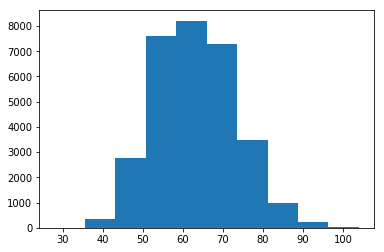

In [33]:
plt.hist(quality_starts.GSc)

(array([166., 132.,  85.,  54.,  14.,  25.,  17.,   4.,   2.,   1.]),
 array([ 86. ,  87.8,  89.6,  91.4,  93.2,  95. ,  96.8,  98.6, 100.4,
        102.2, 104. ]),
 <a list of 10 Patch objects>)

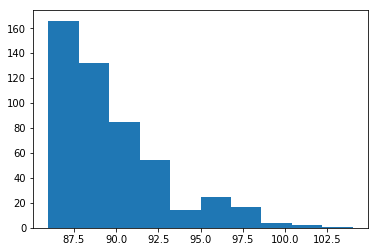

In [34]:
plt.hist(best_500_performances.GSc)

In [35]:
best_500_performances.sort_values(by='GSc',ascending=False);

In [36]:
 Counter(best_500_performances.IP)

Counter({9.0: 392, 8.0: 90, 8.2: 7, 7.2: 2, 7.0: 6, 8.1: 2, 7.1: 1})

In [37]:
best_500_performances.loc[best_500_performances.IP >= 8.2];

In [38]:
Counter(worst_500_performances.Player).most_common();

In [39]:
Counter(best_500_performances.Player).most_common();

In [40]:
best_500_performances['Overlap'] = best_500_performances.Player.isin(worst_500_performances.Player)

worst_500_performances['Overlap'] = worst_500_performances.Player.isin(best_500_performances.Player)

best_100_performances['Overlap'] = best_100_performances.Player.isin(worst_100_performances.Player)

worst_100_performances['Overlap'] = worst_100_performances.Player.isin(best_100_performances.Player)


best_500_performances;

In [41]:
Counter(best_500_performances.Overlap)

Counter({True: 309, False: 191})

In [42]:
np.sum(best_500_performances.Overlap)

309

In [43]:
overlap_best = best_500_performances.loc[best_500_performances.Overlap == True]

overlap_100_best = best_100_performances.loc[best_100_performances.Overlap == True]

overlap_worst = worst_500_performances.loc[worst_500_performances.Overlap == True]

overlap_100_worst = worst_100_performances.loc[worst_100_performances.Overlap == True]

In [44]:
overlap_best;

In [45]:
Counter(overlap_100_best.Player).most_common();

In [46]:
Counter(overlap_100_worst.Player).most_common();

In [47]:
Counter(quality_starts.Player).most_common();

In [48]:
Counter(all_starts.Player).most_common();

In [49]:
james_shields = all_starts.loc[all_starts.Player == 'James Shields']

In [50]:
all_starts.Player.nunique()

1155

In [51]:
all_starts.groupby('Player').GSc.std().sort_values(ascending=False);

In [52]:
player_count = all_starts.Player.value_counts()

hundred_appearances = player_count.loc[player_count >= 100]

In [53]:
hundred_appearances;

In [54]:
Counter(all_starts.Decision.isna())

Counter({False: 44033, True: 19139})

In [55]:
Counter(quality_starts.Decision.isna())

Counter({False: 22321, True: 8625})

In [56]:
8625 + 22321

30946

In [57]:
44033 + 19139

63172

## No decisions occur 28% of the time in quality starts, 30% in all starts

In [58]:
8625/30946

0.2787113035610418

In [59]:
19139/63172

0.30296650414740706

In [60]:
hundred_starts;

In [61]:
hundred_starts.groupby('Player').GSc.std().sort_values(ascending=False);

In [62]:
worst_500_performances.loc[worst_500_performances.Player == 'Colby Lewis']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Rk,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Overlap
27656,27656,27656,27656,27656,123,Colby Lewis,2011-06-06,TEX,DET,3.1,10,9,9,1,3,4,0,88.0,55.0,6,22,21,2,0,0,0,0,0,0,0,0,0,0,1,24.30,-0.400,0.597,GS-4,L,L,7-13,10,06,2011,162,19.197683,True
47107,47107,47107,47107,47107,133,Colby Lewis,2015-05-27,TEX,CLE,2.2,11,10,9,1,2,2,1,74.0,48.0,-1,20,19,3,0,0,0,0,0,0,1,0,0,0,0,30.38,-0.340,0.639,GS-3,L,L,3-12,10,05,2015,162,19.197683,True
47129,47129,47129,47129,47129,155,Colby Lewis,2015-07-05,TEX,LAA,4.0,12,10,10,2,1,1,0,82.0,48.0,-3,26,21,3,0,0,1,0,2,1,0,0,0,0,0,22.50,-0.452,0.695,GS-5,L,L,6-12,10,07,2015,162,19.197683,True
5341,5341,5341,5341,5341,160,Colby Lewis,2007-05-22,OAK,CHW,3.1,12,10,10,2,0,2,0,77.0,46.0,-6,23,21,2,0,0,0,0,0,1,0,0,0,0,1,27.00,-0.366,0.441,GS-4,L,L,4-10,10,05,2007,162,19.197683,True
42261,42261,42261,42261,42261,146,Colby Lewis,2014-07-10,TEX,LAA,2.1,13,13,11,0,1,1,2,61.0,41.0,-16,20,18,3,1,0,0,0,2,1,0,0,0,0,0,42.43,-0.594,0.626,GS-3,L,L,6-15,10,07,2014,162,19.197683,True


In [63]:
best_500_performances.loc[best_500_performances.Player == 'Colby Lewis']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Rk,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Overlap
22683,22683,22683,22683,22683,8,Colby Lewis,2010-04-30,TEX,SEA,9.0,3,0,0,1,10,0,0,116.0,79.0,90,31,30,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.660,1.147,GS-9,NaN,W,2-0,10,04,2010,162,19.197683,True
22688,22688,22688,22688,22688,13,Colby Lewis,2010-06-19,TEX,HOU,9.0,2,1,1,0,9,0,0,101.0,72.0,88,28,28,1,0,0,0,0,0,1,0,0,0,0,1,1.00,0.373,0.917,CG,W,W,5-1,10,06,2010,162,19.197683,True
47039,47039,47039,47039,47039,65,Colby Lewis,2015-09-11,TEX,OAK,9.0,2,0,0,0,4,0,0,97.0,65.0,87,29,29,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.365,0.586,SHO,W,W,4-0,10,09,2015,162,19.197683,True


In [64]:
lone_start = all_starts.loc[all_starts.number_of_apps == 1]

In [65]:
lone_start.sort_values(by='GSc',ascending=False)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Rk,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev
59049,59049,59049,59049,59049,92,Bryse Wilson,2018-08-20,ATL,PIT,5.0,3,0,0,3,5,0,0,87.0,52.0,63,19,16,1,0,0,0,0,0,2,1,0,0,0,0,0.00,0.297,1.303,GS-5,W,W,1-0,10,08,2018,1,NaN
45275,45275,45275,45275,45275,82,Ian Thomas,2015-07-24,LAD,NYM,5.0,3,1,1,0,5,0,0,81.0,49.0,62,17,17,1,0,0,0,0,0,1,0,0,0,0,0,1.80,0.123,0.477,GS-5,W,W,7-2,10,07,2015,1,NaN
60838,60838,60838,60838,60838,97,Kyle McGowin,2018-09-26,WSN,MIA,4.0,1,0,0,3,4,0,0,68.0,34.0,61,16,13,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.095,0.528,GS-5,NaN,W,9-3,10,09,2018,1,NaN
58022,58022,58022,58022,58022,37,Tyler Danish,2017-05-27,CHW,DET,5.0,3,0,0,6,6,0,0,104.0,61.0,61,23,17,1,0,0,0,0,0,1,0,0,0,0,0,0.00,0.284,1.234,GS-5,W,W,3-0,10,05,2017,1,NaN
11452,11452,11452,11452,11452,116,Merkin Valdez,2008-04-02,SFG,LAD,2.0,0,0,0,0,4,0,0,25.0,17.0,60,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.099,0.652,GS-2,NaN,W,2-1,10,04,2008,1,NaN
58900,58900,58900,58900,58900,105,John Axford,2018-07-28,TOR,CHW,3.0,1,0,0,0,3,0,0,38.0,24.0,60,9,9,0,0,0,0,0,0,1,0,0,0,0,0,0.00,0.136,0.764,GS-3,NaN,L,5-9,10,07,2018,1,NaN
48099,48099,48099,48099,48099,153,Alex Wilson,2015-05-27,DET,OAK,3.0,0,0,0,1,1,0,0,43.0,29.0,59,9,8,0,0,0,0,0,0,0,0,0,1,0,0,0.00,0.150,0.764,GS-3,NaN,W,3-2,10,05,2015,1,NaN
56036,56036,56036,56036,56036,157,Matt Grace,2017-08-18,WSN,SDP,4.1,2,0,0,1,1,0,0,52.0,32.0,59,15,13,0,0,0,0,1,0,1,0,0,0,0,0,0.00,0.249,1.207,GS-5,NaN,W,7-1,10,08,2017,1,NaN
41768,41768,41768,41768,41768,139,Jason Lane,2014-07-28,SDP,ATL,6.0,6,1,1,0,2,1,0,92.0,68.0,58,25,25,0,0,0,0,0,0,0,0,0,0,0,0,1.50,0.086,1.020,GS-7,L,L,0-2,10,07,2014,1,NaN
40001,40001,40001,40001,40001,154,Nick Greenwood,2014-09-28,STL,ARI,3.0,1,0,0,0,1,0,0,36.0,24.0,58,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.148,0.952,GS-3,NaN,W,1-0,10,09,2014,1,NaN


In [66]:
jose_contreras = all_starts.loc[all_starts.Player == 'Jose Contreras']

In [67]:
colby_lewis = all_starts.loc[all_starts.Player == 'Colby Lewis']

colby_lewis.groupby('Year').head(300);

In [68]:
historic_pitching = pd.read_csv('historic_pitching.csv')

In [69]:
historic_pitching = historic_pitching.drop(columns=['deathYear','deathMonth','deathDay','deathCountry','deathState','deathCity','birthCountry'])

In [70]:
post_2006_table = historic_pitching.where(historic_pitching.yearID >= 2006)

In [71]:
Old_hoss = historic_pitching.loc[historic_pitching.nameFirst == 'Old Hoss']

In [72]:
Colby_lewis_seasons = historic_pitching.loc[(historic_pitching.nameFirst == 'Colby') & (historic_pitching.nameLast == 'Lewis') ]

In [73]:
Colby_lewis_seasons.G.sum()

233

In [74]:
all_starts.sort_values(by='GSc',ascending=True);

In [75]:
post_2006_table = post_2006_table.dropna(how='all')

post_2006_table.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthState,birthCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,full_name
26756,clemero02,2006.0,1.0,HOU,NL,7.0,6.0,19.0,19.0,0.0,0.0,0.0,340.0,89.0,29.0,7.0,29.0,102.0,0.216,2.30,1.0,3.0,4.0,0.0,451.0,0.0,34.0,5.0,1.0,11.0,1962.0,8.0,4.0,OH,Dayton,Roger,Clemens,William Roger,205.0,76.0,R,R,1984-05-15,2007-09-16,clemr001,clemero02,William Roger Clemens
26757,clemero02,2007.0,1.0,NYA,AL,6.0,6.0,18.0,17.0,0.0,0.0,0.0,297.0,99.0,46.0,9.0,31.0,68.0,0.261,4.18,0.0,7.0,5.0,0.0,420.0,0.0,52.0,2.0,3.0,9.0,1962.0,8.0,4.0,OH,Dayton,Roger,Clemens,William Roger,205.0,76.0,R,R,1984-05-15,2007-09-16,clemr001,clemero02,William Roger Clemens
27899,maddugr01,2006.0,1.0,CHN,NL,9.0,11.0,22.0,22.0,0.0,0.0,0.0,409.0,153.0,71.0,14.0,23.0,81.0,0.284,4.69,3.0,0.0,0.0,0.0,572.0,0.0,78.0,7.0,3.0,10.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27900,maddugr01,2006.0,2.0,LAN,NL,6.0,3.0,12.0,12.0,0.0,0.0,0.0,221.0,66.0,27.0,6.0,14.0,36.0,0.244,3.30,4.0,0.0,0.0,0.0,290.0,0.0,31.0,4.0,2.0,7.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27901,maddugr01,2007.0,1.0,SDN,NL,14.0,11.0,34.0,34.0,1.0,0.0,0.0,594.0,221.0,91.0,14.0,25.0,104.0,0.285,4.14,3.0,5.0,6.0,0.0,830.0,0.0,92.0,15.0,8.0,14.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux


In [76]:
post_2006_table.loc[post_2006_table['playerID'] == 'maddugr01']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthState,birthCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,full_name
27899,maddugr01,2006.0,1.0,CHN,NL,9.0,11.0,22.0,22.0,0.0,0.0,0.0,409.0,153.0,71.0,14.0,23.0,81.0,0.284,4.69,3.0,0.0,0.0,0.0,572.0,0.0,78.0,7.0,3.0,10.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27900,maddugr01,2006.0,2.0,LAN,NL,6.0,3.0,12.0,12.0,0.0,0.0,0.0,221.0,66.0,27.0,6.0,14.0,36.0,0.244,3.30,4.0,0.0,0.0,0.0,290.0,0.0,31.0,4.0,2.0,7.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27901,maddugr01,2007.0,1.0,SDN,NL,14.0,11.0,34.0,34.0,1.0,0.0,0.0,594.0,221.0,91.0,14.0,25.0,104.0,0.285,4.14,3.0,5.0,6.0,0.0,830.0,0.0,92.0,15.0,8.0,14.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27902,maddugr01,2008.0,1.0,SDN,NL,6.0,9.0,26.0,26.0,0.0,0.0,0.0,460.0,161.0,68.0,16.0,26.0,80.0,0.271,3.99,4.0,2.0,5.0,2.0,638.0,0.0,80.0,6.0,6.0,13.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27903,maddugr01,2008.0,2.0,LAN,NL,2.0,4.0,7.0,7.0,0.0,0.0,0.0,122.0,43.0,23.0,5.0,4.0,18.0,0.276,5.09,1.0,0.0,1.0,0.0,166.0,0.0,25.0,3.0,2.0,3.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux


In [91]:
all_starts.to_csv('all_starts.csv',index=False)

In [92]:
post_2006_table.to_csv('post_2006_table.csv',index=False)

(array([  817.,  1883.,  3038.,  2976.,  3357.,  3873.,  4736.,  6125.,
         8763., 11131.]),
 array([1871. , 1885.7, 1900.4, 1915.1, 1929.8, 1944.5, 1959.2, 1973.9,
        1988.6, 2003.3, 2018. ]),
 <a list of 10 Patch objects>)

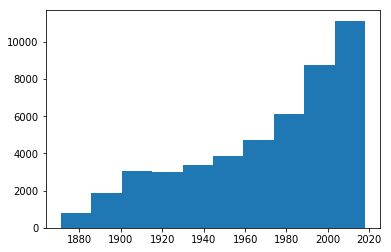

In [79]:
plt.hist(historic_pitching.yearID)

In [80]:
all_seasons = pd.read_csv('all_seasons.csv')

In [81]:
all_seasons;

In [82]:
all_seasons['K/9'] = (all_seasons.SO / all_seasons.IP) * 9

all_seasons['BB/9'] = (((all_seasons.BB + all_seasons.IBB) /(all_seasons.IP)) * 9)

In [83]:
all_seasons.sort_values(by='BB/9',ascending=True).head(200)

,Rk,Player,Year,Age,Tm,Lg,G,GS,CG,SHO,GF,W,L,W-L%,SV,IP,H,R,ER,BB,SO,ERA,FIP,K%,BB%,ERA+,BAbip,HR,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,BA,OBP,SLG,OPS,OPS+,Pit,Str,K/9,BB/9
7727,11,Daniel Hudson,2014,27,ARI,NL,3,0,0,0,0,0,1,0.0,0,2.2,4,4,4,0,2,13.50,1.63,15.4%,0.0%,32.0,.364,0,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0.308,0.308,0.462,0.769,117.0,49,33,8.181818,0.0
2767,4,David Carpenter,2014,26,LAA,AL,1,0,0,0,0,0,0,NaN,0,3.0,1,0,0,0,0,0.00,5.13,0.0%,0.0%,NaN,.100,0,12,10,0,0,0,2,0,0,0,1,0,0,0,0,0.100,0.250,0.100,0.350,7.0,39,26,0.000000,0.0
2772,9,Jarrett Grube,2014,32,LAA,AL,1,0,0,0,1,0,0,NaN,0,0.2,1,1,1,0,0,13.50,22.63,0.0%,0.0%,44.0,.000,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0.333,0.333,1.333,1.667,357.0,7,4,0.000000,0.0
6540,4,Jared Burton,2010,29,CIN,NL,4,0,0,0,2,0,0,NaN,0,3.1,0,0,0,0,1,0.0,2.48,10.0%,0.0%,NaN,0.0,0,10,10,0,0,0,0,0,0,0,1,0,0,0,0,0.000,0.000,0.000,0.000,-100.0,42,27,2.903226,0.0
8187,28,Ichiro Suzuki,2015,41,MIA,NL,1,0,0,0,1,0,0,NaN,0,1.0,2,1,1,0,0,9.00,3.13,0.0%,0.0%,59.0,.400,0,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0.400,0.400,0.800,1.200,234.0,18,11,0.000000,0.0
5895,6,Jesus Colome,2009,31,MIL,NL,5,0,0,0,3,0,0,NaN,0,6.1,11,4,4,0,3,5.68,4.20,10.7%,0.0%,77.0,0.41700000000000004,1,28,28,3,0,0,0,0,0,2,1,0,0,0,1,0.393,0.393,0.607,1.000,170.0,91,59,4.426230,0.0
683,15,Alex Serrano,2008,27,LAA,AL,1,0,0,0,1,0,0,NaN,0,1.0,1,0,0,0,1,0.0,1.13,25.0%,0.0%,NaN,0.33299999999999996,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0.250,0.250,0.500,0.750,92.0,10,8,9.000000,0.0
7658,13,Martin Maldonado,2014,27,MIL,NL,1,0,0,0,1,0,0,NaN,0,1.0,1,0,0,0,0,0.0,3.13,0.0%,0.0%,NaN,0.25,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0.250,0.250,0.250,0.500,44.0,15,9,0.000000,0.0
258,3,Chad Durbin,2006,28,DET,AL,3,0,0,0,1,0,0,NaN,0,6.0,6,1,1,0,3,1.5,4.31,12.5%,0.0%,318.0,0.25,1,24,24,1,0,0,0,0,0,0,0,0,0,0,0,0.250,0.250,0.417,0.667,69.0,83,57,4.500000,0.0
2766,3,Sean Burnett,2014,31,LAA,AL,3,0,0,0,0,0,0,NaN,0,0.2,1,1,1,0,0,13.50,3.13,0.0%,0.0%,44.0,.333,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0.333,0.333,0.333,0.667,95.0,19,13,0.000000,0.0


In [1]:
#pitch_data = pitching_stats(2006,2018)

In [ ]:
pitch_data['K%']

In [ ]:
cluster_data = pitch_data[['Season','Name','Age','WAR','IP','K/9','BB/9','tERA','HR/9','LOB%','FIP','GB/FB','BABIP','Pace (pi)','Zone% (pi)','Contact% (pi)','K%','BB%','SwStr%']]


In [ ]:
cluster_data.to_csv('cluster_data.csv',index=False)